<a href="https://colab.research.google.com/github/akshithaa1/DiabetesPrediction/blob/main/diabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
# from mlxtend.plotting import plot_decision_regions
# import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, roc_curve, roc_auc_score
# from sklearn import metrics
# from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Import Dataset**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 15.8MB/s]


In [ ]:
df = pd.read_csv('/content/pima-indians-diabetes-database.zip')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Exploratory Data Analysis(EDA)**

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Statistical summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
#To check null values
#df.isna().sum()
# df.isnull().values.any() - false
print(df.isnull().sum())
df.isnull().values.any()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


False

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.duplicated().sum()#check if their are any duplicate rows

0

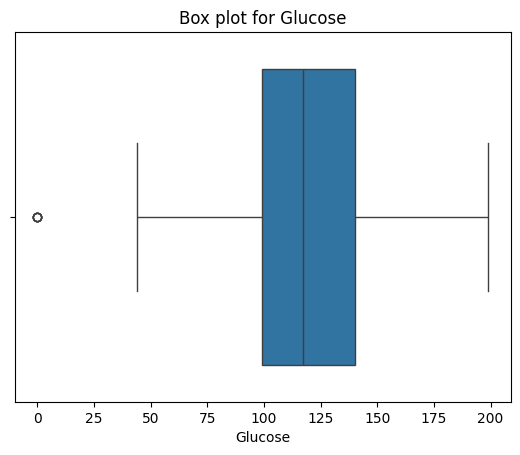

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot to visually detect outliers for a feature (e.g., 'Glucose')
sns.boxplot(x=df['Glucose'])
plt.title('Box plot for Glucose')
plt.show()

In [ ]:
# Function to apply Winsorization to a feature
def winsorize_feature(df, feature, lower_percentile=5, upper_percentile=95):
    # Calculate the lower and upper percentiles
    lower_limit = df[feature].quantile(lower_percentile / 100)
    upper_limit = df[feature].quantile(upper_percentile / 100)

    # Apply Winsorization: cap the values at the percentiles
    df[feature] = df[feature].clip(lower=lower_limit, upper=upper_limit)

    return df

# Create a copy of the original DataFrame
df_copy = df.copy() # Creating a copy of 'df' and assigning it to 'df_copy'

# Apply Winsorization to the 'Glucose' feature
df_copy = winsorize_feature(df_copy, 'Glucose')

# Check the updated data
print(df_copy['Glucose'].describe())

count    768.000000
mean     121.343750
std       28.989079
min       79.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      181.000000
Name: Glucose, dtype: float64


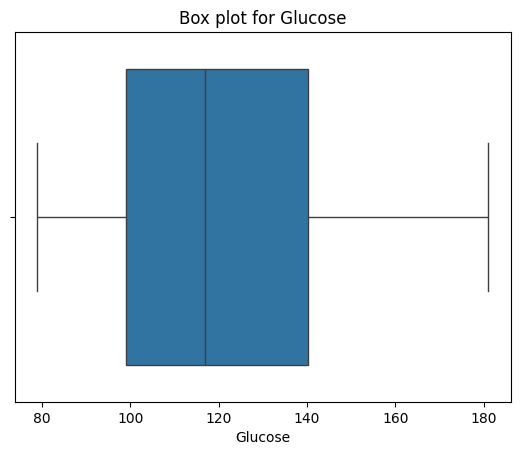

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot to visually detect outliers for a feature (e.g., 'Glucose')
sns.boxplot(x=df_copy['Glucose'])
plt.title('Box plot for Glucose')
plt.show()

In [ ]:
# Apply Winsorization to the 'Glucose' feature
df_copy = winsorize_feature(df_copy, 'BMI')

# Check the updated data
print(df_copy['BMI'].describe())

count    768.000000
mean      32.155134
std        6.344958
min       21.800000
25%       27.300000
50%       32.000000
75%       36.600000
max       44.326750
Name: BMI, dtype: float64


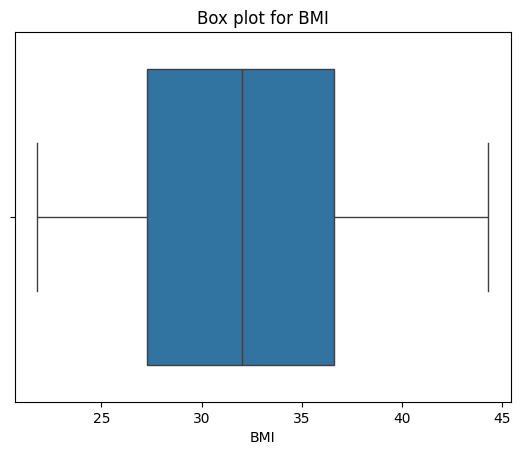

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot to visually detect outliers for a feature (e.g., 'Glucose')
sns.boxplot(x=df_copy['BMI'])
plt.title('Box plot for BMI')
plt.show()

In [ ]:
print(df_copy['Age'].min())  # Minimum age
print(df_copy['Age'].max())  # Maximum age

21
81


In [ ]:
# Update the bins to cover a larger age range
bins = [20, 30, 40, 50, 60, 70, 80, 90]  # Added a new bin for ages above 80
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

# Re-categorize Age into Age_group with the updated bins
df_copy['Age_group'] = pd.cut(df_copy['Age'], bins=bins, labels=labels, right=False)

# Check if missing values still exist
print(df_copy['Age_group'].isnull().sum())  # Check if there are any missing values

# Print the updated Age_group column to verify the changes
print(df_copy['Age_group'].head())

0
0    50-60
1    30-40
2    30-40
3    20-30
4    30-40
Name: Age_group, dtype: category
Categories (7, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80' < '80+']


In [ ]:
df_copy.Age_group.isnull().sum()

0

In [ ]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group
0,6,148,72,35,0,33.6,0.627,50,1,50-60
1,1,85,66,29,0,26.6,0.351,31,0,30-40
2,8,181,64,0,0,23.3,0.672,32,1,30-40
3,1,89,66,23,94,28.1,0.167,21,0,20-30
4,0,137,40,35,168,43.1,2.288,33,1,30-40


In [ ]:
# Create a new feature 'BMI_category' based on BMI values
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to the BMI column to create the new feature
df_copy['BMI_category'] = df_copy['BMI'].apply(categorize_bmi)

# Check the newly created feature
print(df_copy[['BMI', 'BMI_category']].head())

# Verify the unique categories
print(df_copy['BMI_category'].value_counts())

    BMI BMI_category
0  33.6        Obese
1  26.6   Overweight
2  23.3       Normal
3  28.1   Overweight
4  43.1        Obese
BMI_category
Obese         478
Overweight    174
Normal        116
Name: count, dtype: int64


In [ ]:
df_copy.BMI_category.isnull().sum()

0

In [ ]:
# Create a new feature 'Insulin_to_BMI_Ratio' by dividing 'Insulin' by 'BMI'
df_copy['Insulin_to_BMI_Ratio'] = df_copy['Insulin'] / df_copy['BMI']

# Check the newly created feature
print(df_copy[['Insulin', 'BMI', 'Insulin_to_BMI_Ratio']].head())

# Check for any null or infinite values in the new feature
print(df_copy['Insulin_to_BMI_Ratio'].isnull().sum())  # Check for missing values
print((df_copy['Insulin_to_BMI_Ratio'] == np.inf).sum())  # Check for infinite values

   Insulin   BMI  Insulin_to_BMI_Ratio
0        0  33.6              0.000000
1        0  26.6              0.000000
2        0  23.3              0.000000
3       94  28.1              3.345196
4      168  43.1              3.897912
0
0


In [ ]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group,BMI_category,Insulin_to_BMI_Ratio
0,6,148,72,35,0,33.6,0.627,50,1,50-60,Obese,0.000000
1,1,85,66,29,0,26.6,0.351,31,0,30-40,Overweight,0.000000
2,8,181,64,0,0,23.3,0.672,32,1,30-40,Normal,0.000000
3,1,89,66,23,94,28.1,0.167,21,0,20-30,Overweight,3.345196
4,0,137,40,35,168,43.1,2.288,33,1,30-40,Obese,3.897912


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding
df_copy['Age_group_encoded'] = label_encoder.fit_transform(df_copy['Age_group'])
df_copy['BMI_category_encoded'] = label_encoder.fit_transform(df_copy['BMI_category'])

# Check the transformed data
print(df_copy[['Age_group', 'Age_group_encoded', 'BMI_category', 'BMI_category_encoded']].head())

  Age_group  Age_group_encoded BMI_category  BMI_category_encoded
0     50-60                  3        Obese                     1
1     30-40                  1   Overweight                     2
2     30-40                  1       Normal                     0
3     20-30                  0   Overweight                     2
4     30-40                  1        Obese                     1


In [ ]:
# # Assuming `age_label_encoder` is the original LabelEncoder for Age_group
# # and `bmi_label_encoder` for BMI_category

# # Decode Age_group_encoded
# print(age_label_encoder.inverse_transform(df_copy['Age_group_encoded']))

# # Decode BMI_category_encoded
# print(bmi_label_encoder.inverse_transform(df_copy['BMI_category_encoded']))

In [ ]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group,BMI_category,Insulin_to_BMI_Ratio,Age_group_encoded,BMI_category_encoded
0,6,148,72,35,0,33.6,0.627,50,1,50-60,Obese,0.000000,3,1
1,1,85,66,29,0,26.6,0.351,31,0,30-40,Overweight,0.000000,1,2
2,8,181,64,0,0,23.3,0.672,32,1,30-40,Normal,0.000000,1,0
3,1,89,66,23,94,28.1,0.167,21,0,20-30,Overweight,3.345196,0,2
4,0,137,40,35,168,43.1,2.288,33,1,30-40,Obese,3.897912,1,1


In [ ]:
# Function to save preprocessed data summary into a README file
def save_to_readme(df, filename="README.md"):
    with open(filename, "w") as f:
        f.write("# Preprocessed Data Summary\n\n")
        f.write("This file contains a summary of the preprocessed data used for analysis.\n\n")

        # Write dataset shape
        f.write(f"## Dataset Shape\n")
        f.write(f"Rows: {df.shape[0]}\n")
        f.write(f"Columns: {df.shape[1]}\n\n")

        # Write column names
        f.write(f"## Columns in the Dataset\n")
        for col in df.columns:
            f.write(f"- {col}\n")
        f.write("\n")

        # Write basic statistics
        f.write("## Dataset Statistics\n")
        f.write("```text\n")
        f.write(str(df.describe()))
        f.write("\n```\n\n")

        # Write sample data
        f.write("## Sample Data\n")
        f.write("```text\n")
        f.write(str(df.head()))
        f.write("\n```\n")

        f.write("\n---\n")
        f.write("Generated by the data preprocessing script.")
    print(f"README file '{filename}' created successfully!")

# Save the DataFrame `df_copy` as a README file
save_to_readme(df_copy)

README file 'README.md' created successfully!


In [ ]:
# Dropping the columns 'Age_group' and 'BMI_category'
df_copy = df_copy.drop(columns=['Age_group', 'BMI_category'])

# Verifying the columns have been dropped
print(df_copy.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Insulin_to_BMI_Ratio', 'Age_group_encoded', 'BMI_category_encoded'],
      dtype='object')


In [ ]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_to_BMI_Ratio,Age_group_encoded,BMI_category_encoded
0,6,148,72,35,0,33.6,0.627,50,1,0.000000,3,1
1,1,85,66,29,0,26.6,0.351,31,0,0.000000,1,2
2,8,181,64,0,0,23.3,0.672,32,1,0.000000,1,0
3,1,89,66,23,94,28.1,0.167,21,0,3.345196,0,2
4,0,137,40,35,168,43.1,2.288,33,1,3.897912,1,1


#**Data Visualization**

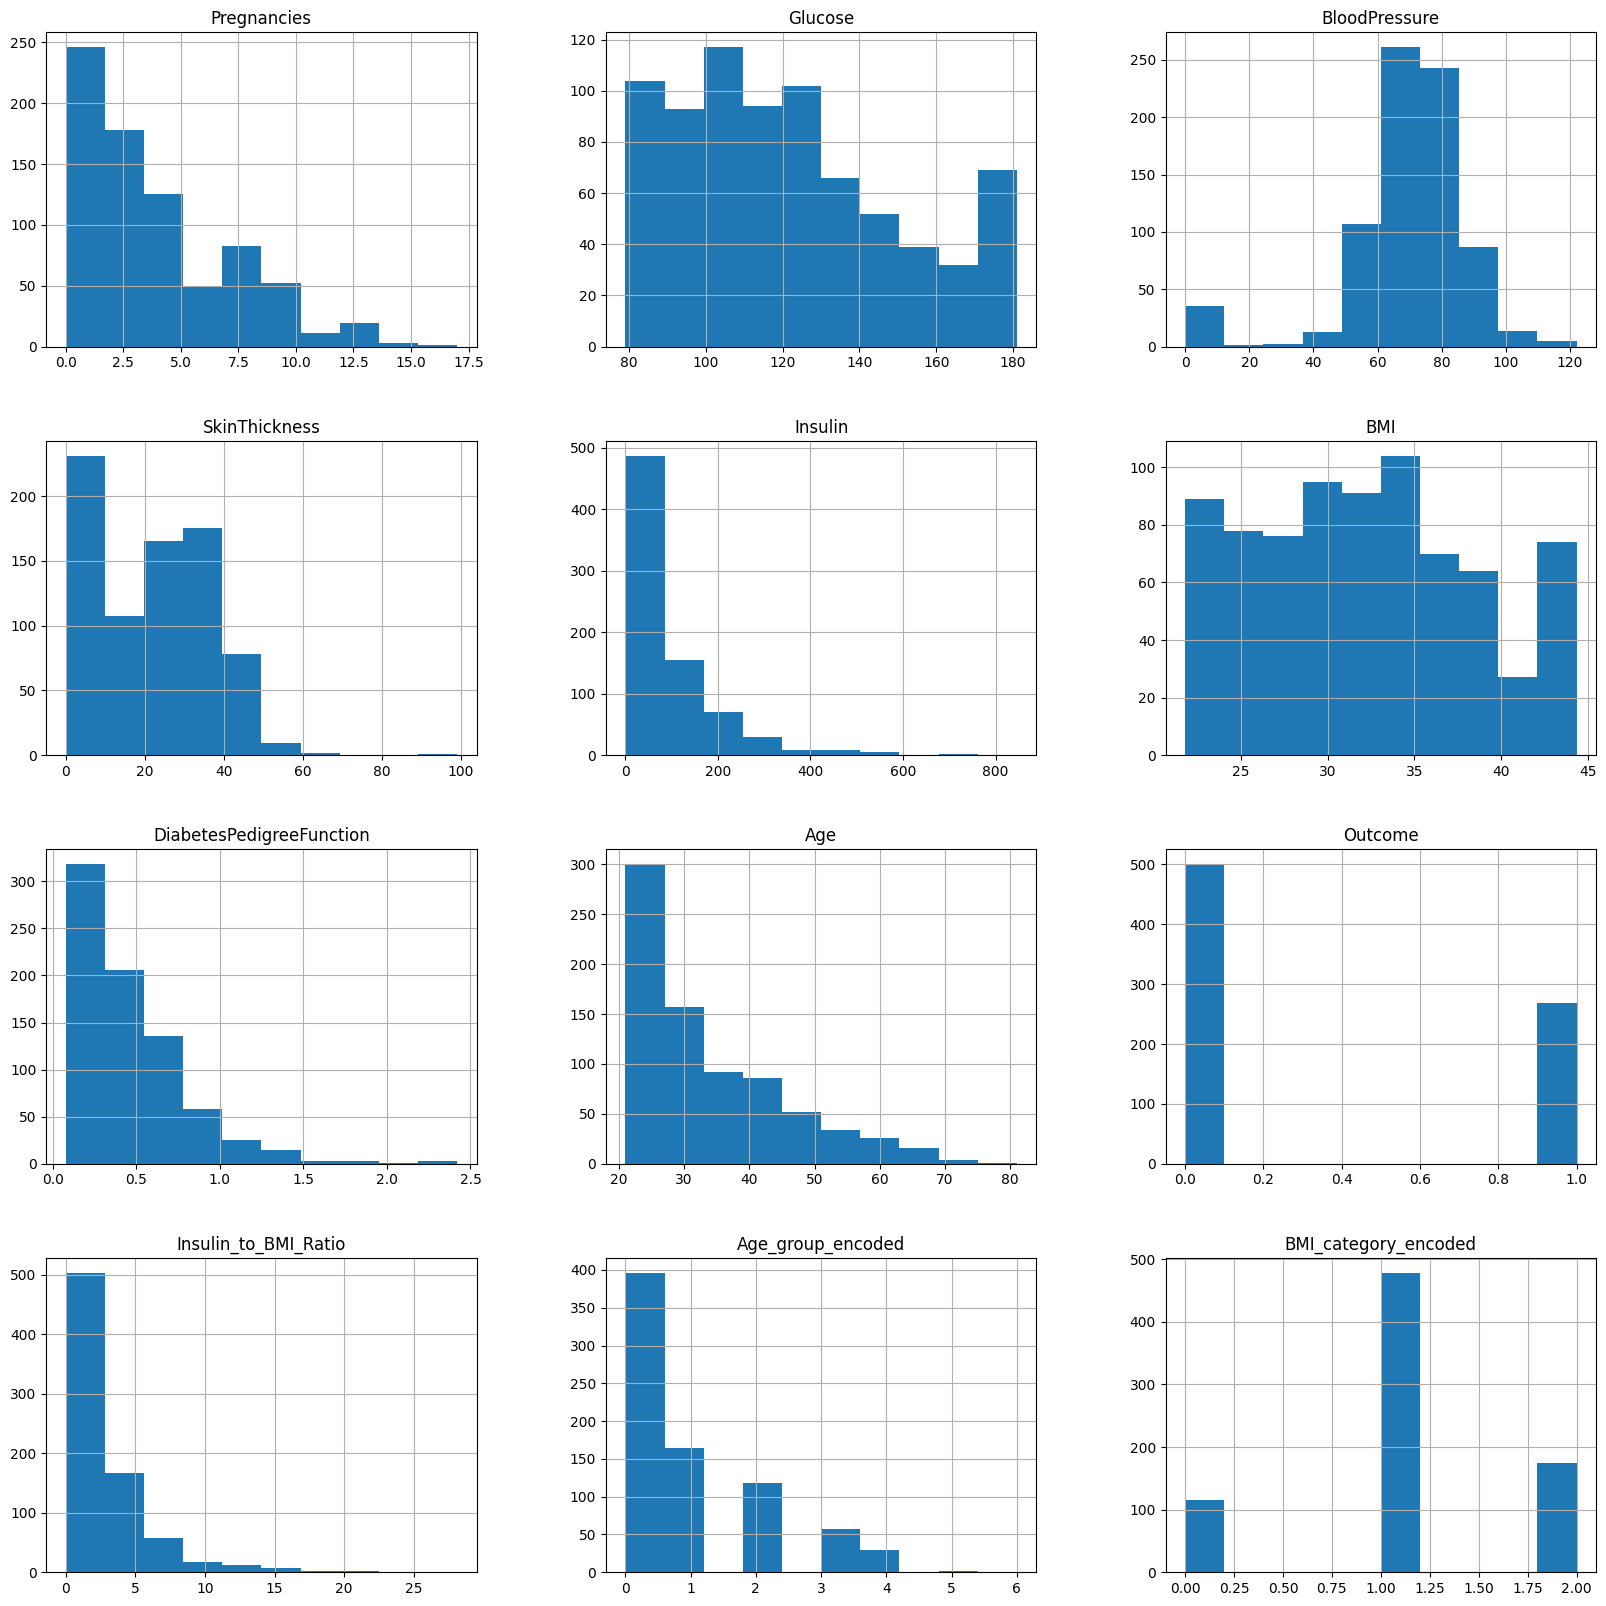

In [ ]:
#plotting the data distribution plots
p=df_copy.hist(figsize = (20, 20))

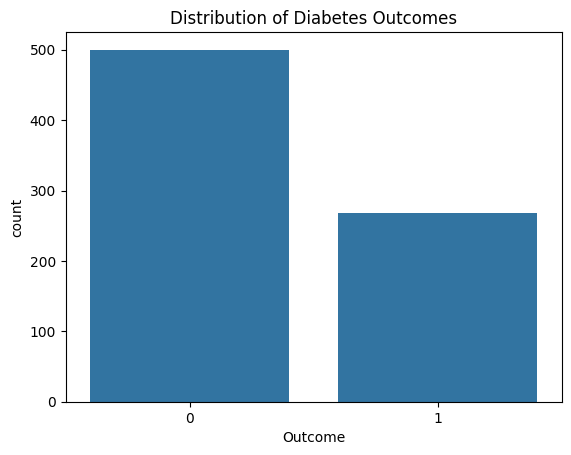

In [ ]:
sns.countplot(x='Outcome', data=df_copy)
plt.title('Distribution of Diabetes Outcomes')
plt.show()

# **Correlation heatmap**

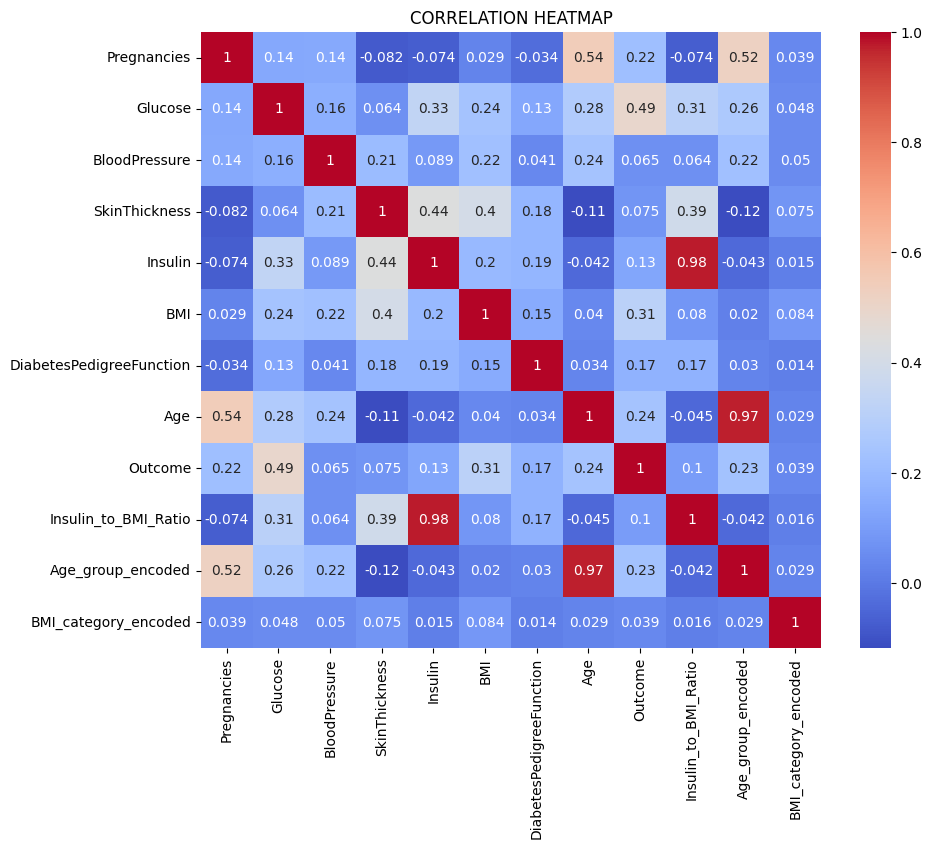

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('CORRELATION HEATMAP')
plt.show()

# **Splitting data into features and target**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'Outcome' is the target column
X = df_copy.drop(columns=['Outcome'])  # Features
y = df_copy['Outcome']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifying the split
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Training features shape: (614, 11)
Testing features shape: (154, 11)
Training target shape: (614,)
Testing target shape: (154,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [3, 6, 10, None],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best model: {grid_search.best_estimator_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best model: RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=50,
                       random_state=42)


In [ ]:
# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest with optimized parameters: {accuracy:.2f}")

Accuracy of Random Forest with optimized parameters: 0.75


Confusion Matrix:
 [[80 19]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

AUC: 0.82


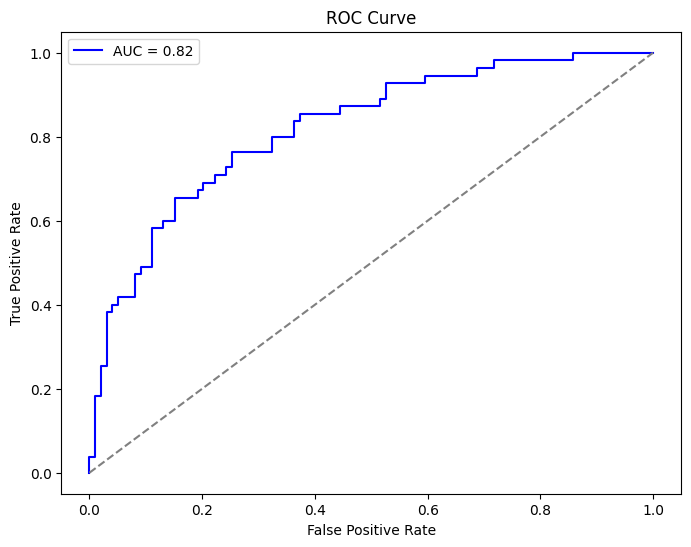

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
auc_score = auc(fpr, tpr)
print(f"AUC: {auc_score:.2f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Predict on the test data using the trained model
y_pred_test = best_rf_model.predict(X_test)

# Print the predictions
print("Predictions (1 = Diabetes, 0 = No Diabetes):")
print(y_pred_test)

# You can also check the accuracy of predictions on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of the predictions on the test set: {accuracy_test:.2f}")

# If you want to predict for new, unseen data (example X_new), you can use:
# y_pred_new = best_rf_model.predict(X_new)

Predictions (1 = Diabetes, 0 = No Diabetes):
[1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]
Accuracy of the predictions on the test set: 0.76


# **Test on new data**

In [ ]:
X_new = pd.DataFrame({
    'Pregnancies': [2],
    'Glucose': [85],
    'BloodPressure': [66],
    'SkinThickness': [29],
    'Insulin': [0],
    'BMI': [26.6],
    'DiabetesPedigreeFunction': [0.351],
    'Age': [31],
    'Insulin_to_BMI_Ratio': [0],  # Make sure to have the same derived features as in the preprocessing
    'Age_group_encoded': [1],  # Example: encoded Age group
    'BMI_category_encoded': [2]  # Example: encoded BMI category
})

In [ ]:
# Use the trained model to make predictions
y_pred_new = best_rf_model.predict(X_new)

In [ ]:
# Output the prediction: 1 = Diabetes, 0 = No Diabetes
print(f"Prediction for new data: {y_pred_new[0]}")

Prediction for new data: 0


In [ ]:

# Optionally, you can use predict_proba to get probabilities
y_pred_proba_new = best_rf_model.predict_proba(X_new)
print(f"Probability of no diabetes: {y_pred_proba_new[0][0]:.2f}")
print(f"Probability of diabetes: {y_pred_proba_new[0][1]:.2f}")

Probability of no diabetes: 0.96
Probability of diabetes: 0.04
